<a href="https://colab.research.google.com/github/dutt2022/Coursera-Data-science-Projects/blob/main/CIFAR_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This tutorial demonstrates training a simple Convolutional Neural Network (CNN) to classify CIFAR images. Because this tutorial uses the Keras Sequential API, creating and training your model will take just a few lines of code.

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Download and prepare the CIFAR10 dataset
The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
i = 100
plt.imshow(train_images[i]) # Show images are not shuffled
y_train[i]

Verify the data
To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:

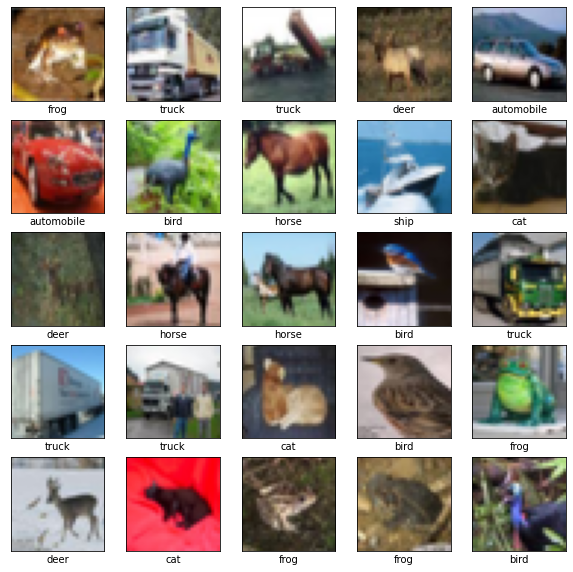

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Create the convolutional base
The 6 lines of code below define the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument input_shape to your first layer.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))


Let's display the architecture of your model so far:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 6, 6, 64)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          3

Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically, as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

Add Dense layers on top
To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D, then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

Here's the complete architecture of your model:

The network summary shows that (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

Compile and train the mode

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 13s 5ms/step - loss: 1.6266 - accuracy: 0.4022 - val_loss: 1.3064 - val_accuracy: 0.5292
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2849 - accuracy: 0.5390 - val_loss: 1.1586 - val_accuracy: 0.5883
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1576 - accuracy: 0.5910 - val_loss: 1.0878 - val_accuracy: 0.6218
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0735 - accuracy: 0.6204 - val_loss: 0.9914 - val_accuracy: 0.6625
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0141 - accuracy: 0.6426 - val_loss: 0.9382 - val_accuracy: 0.6715
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9677 - accuracy: 0.6604 - val_loss: 0.9185 - val_accuracy: 0.6839
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9311 - accuracy: 0.6736 - val_loss: 0.8848 - val_accuracy: 0.6924
Ep

Evaluate the model

313/313 - 1s - loss: 0.8334 - accuracy: 0.7106 - 749ms/epoch - 2ms/step


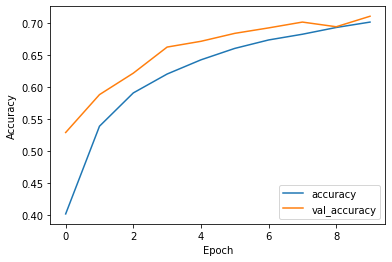

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

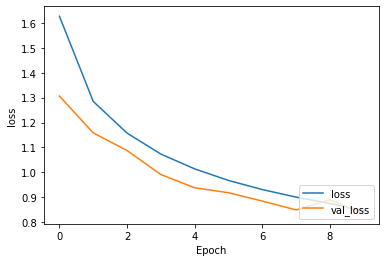

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
print(test_acc)

0.7106000185012817


In [ ]:
print(test_loss)

0.833391010761261


In [ ]:
train_loss, train_acc = model.evaluate(train_images,  train_labels, verbose=2)

1563/1563 - 4s - loss: 0.6883 - accuracy: 0.7640 - 4s/epoch - 2ms/step


In [ ]:
print(train_loss)

0.6882690787315369


In [ ]:
print(train_acc)

0.7640200257301331


In [ ]:
import numpy as np
y_pred=np.argmax(model.predict(test_images),axis=-1)


In [ ]:
#test_images=np.argmax(test_images,axis=-1)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

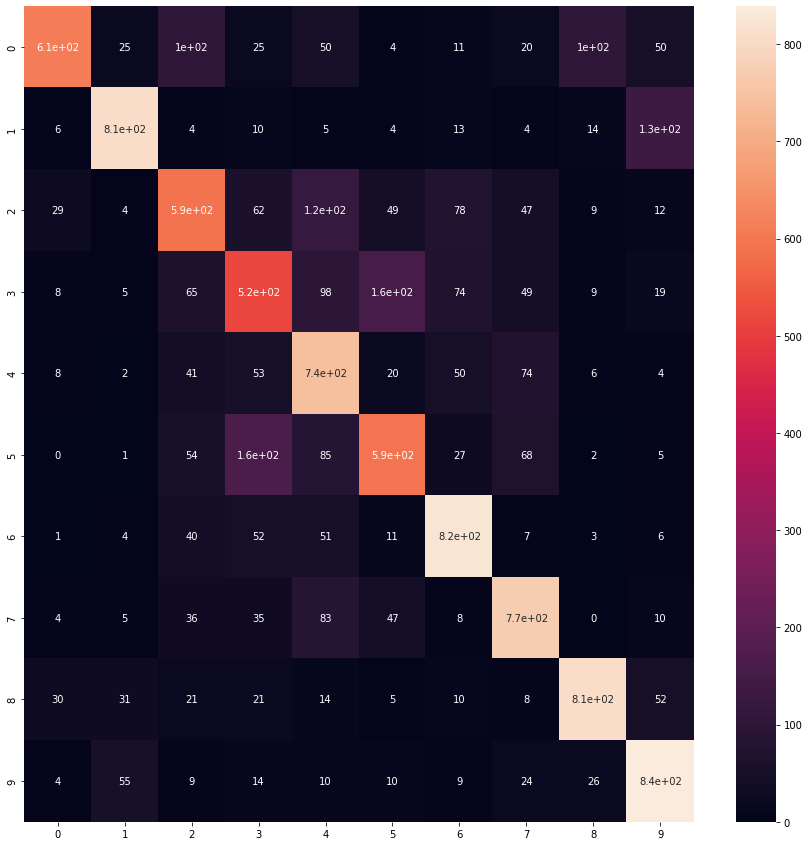

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(test_labels,y_pred)
plt.figure(figsize = (15,15))
sns.heatmap(cm, annot=True)

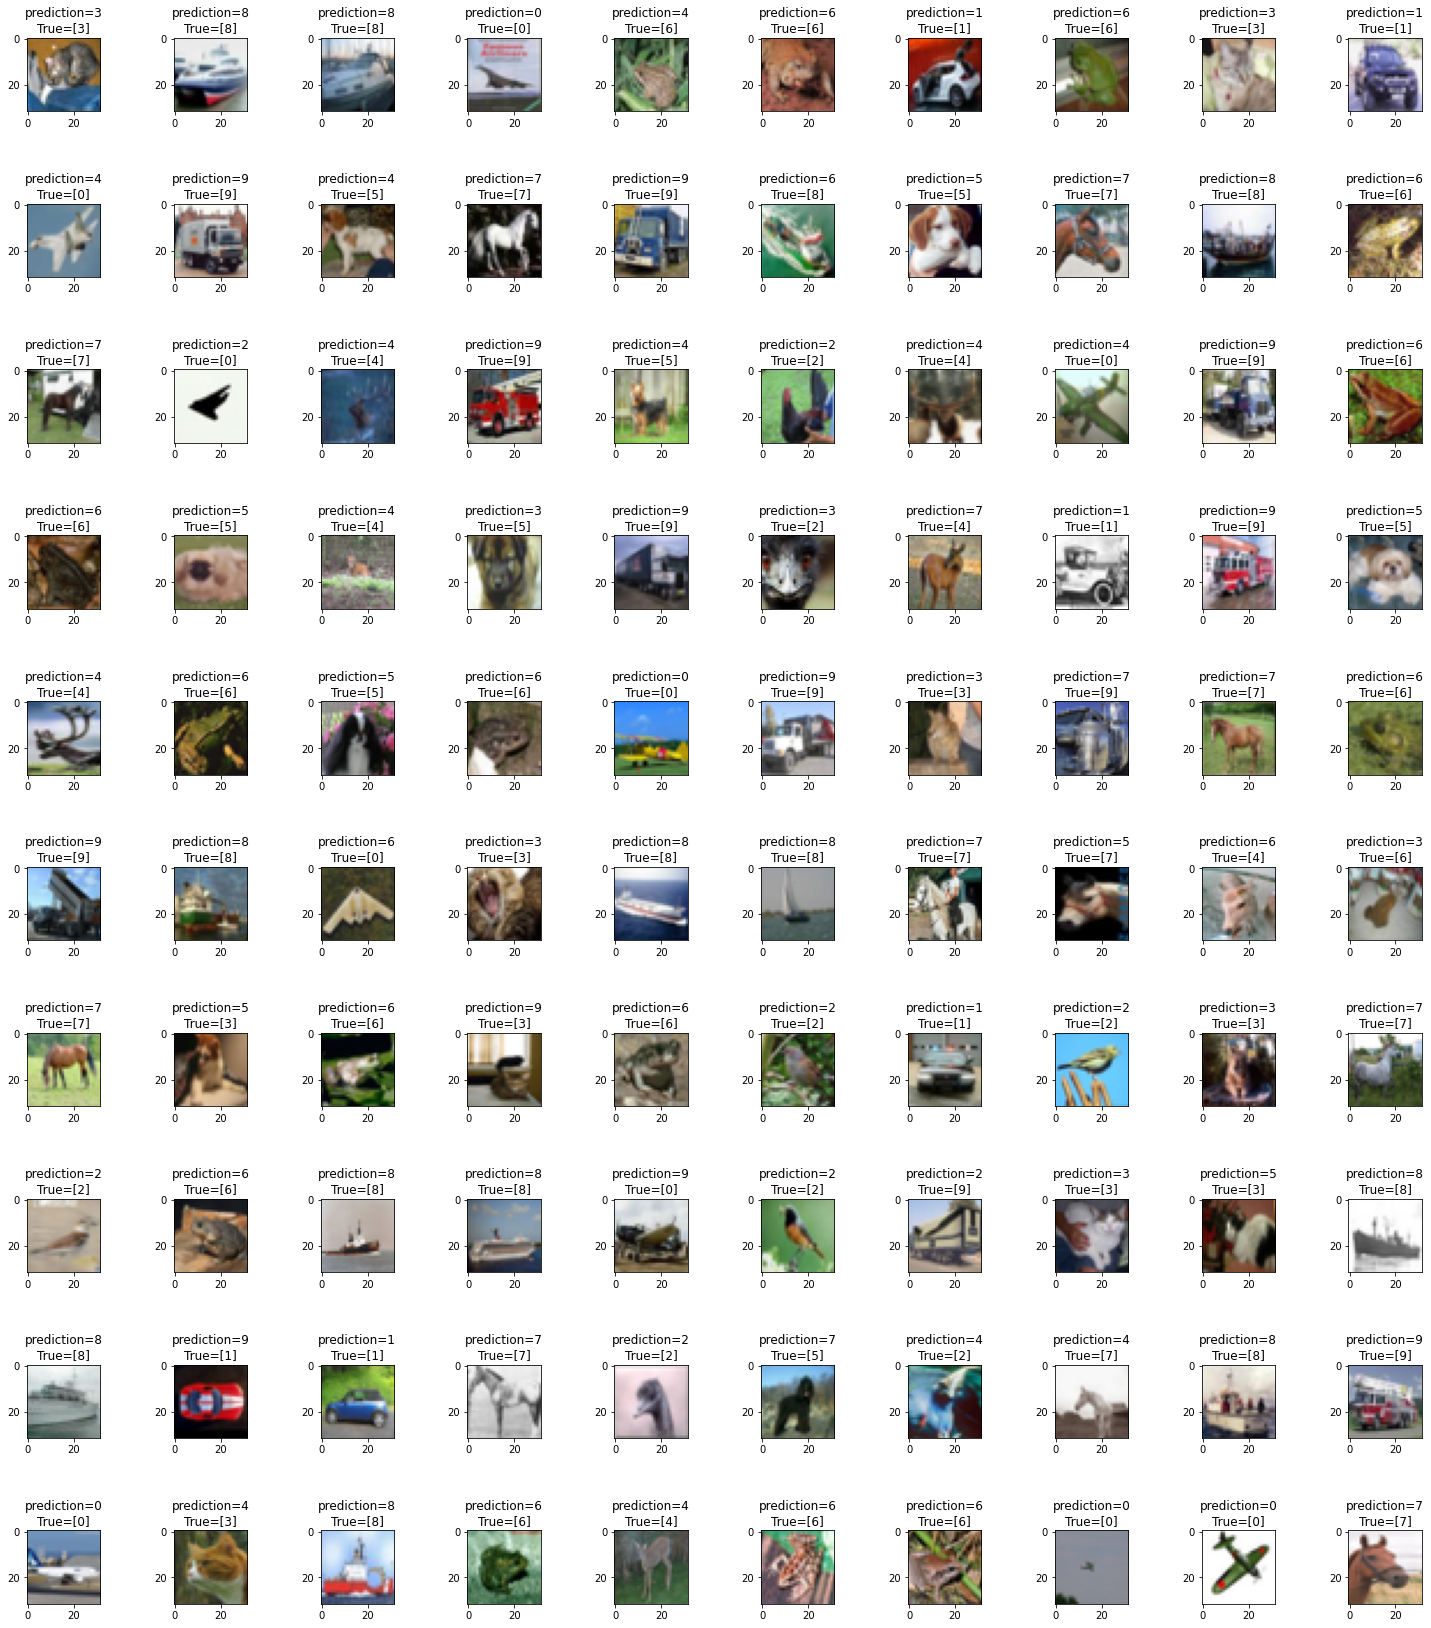

In [ ]:
fig, axes=plt.subplots(10,10,figsize=(25,30))
axes=axes.ravel()


for i in np.arange(0,10*10):
    1
   # index=np.random.ran0000000000000000000000000dint(0,n_training)
    axes[i].imshow(test_images[i].squeeze())
    axes[i].set_title('prediction={}\nTrue={}'.format(y_pred[i],test_labels[i]))
    plt.subplots_adjust(wspace=1)